## Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

##### 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

In [1]:
import pandas as pd

In [2]:
dc = pd.read_csv('desafio_indicium_imdb.csv')

In [3]:
dc.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
dc.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [6]:
dc.Gross.dtype

dtype('O')

In [7]:
# Alteração de tipo de dados:

dc["Gross"] = dc["Gross"].str.replace(",","").astype(float)

### Transformação de dados

In [8]:
dc.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<AxesSubplot:>

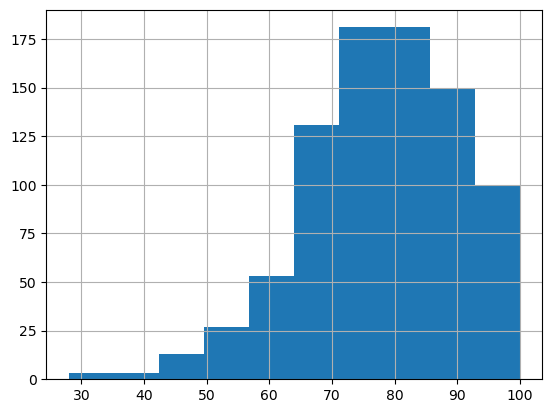

In [9]:
dc.Meta_score.hist()

In [10]:
dc.Meta_score.describe()

count    842.000000
mean      77.969121
std       12.383257
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

In [11]:
# Os dados pelo histograma não apresentam uma distribuição normal, sendo assim, os números serão preenchidos com o valor da mediana.

dc['Meta_score'].fillna(dc['Meta_score'].median(), inplace = True)

<AxesSubplot:>

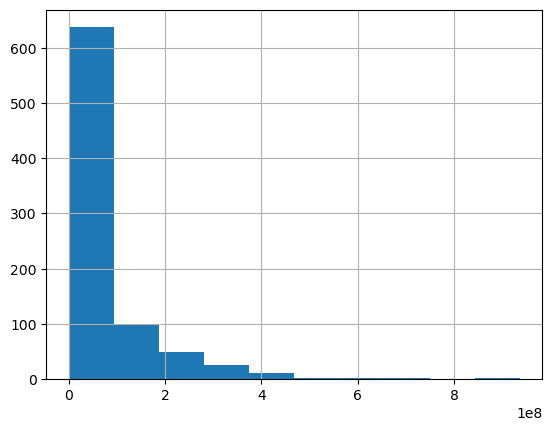

In [12]:
dc.Gross.hist()

In [13]:
dc.Gross.describe()

count    8.300000e+02
mean     6.808257e+07
std      1.098076e+08
min      1.305000e+03
25%      3.245338e+06
50%      2.345744e+07
75%      8.087634e+07
max      9.366622e+08
Name: Gross, dtype: float64

In [14]:
dc['Gross'].fillna(dc['Gross'].median(), inplace = True)

In [15]:
dc.Certificate.value_counts()

U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [16]:
#dc['Certificate'].fillna('Sem Classificacao', inplace = True) 

In [17]:
### na coluna certificate - label encoding

dc[['Runtime_Minutes', 'Runtime_Unit']] = dc['Runtime'].str.split(' ', expand=True)

dc['Runtime_Minutes'] = dc['Runtime_Minutes'].astype(int)

dc.drop(columns=['Runtime'], inplace=True)

print(dc)

     Unnamed: 0                                   Series_Title Released_Year  \
0             1                                  The Godfather          1972   
1             2                                The Dark Knight          2008   
2             3                         The Godfather: Part II          1974   
3             4                                   12 Angry Men          1957   
4             5  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
994         995                         Breakfast at Tiffany's          1961   
995         996                                          Giant          1956   
996         997                          From Here to Eternity          1953   
997         998                                       Lifeboat          1944   
998         999                                   The 39 Steps          1935   

    Certificate                     Gen

In [18]:
## One hot enconding para transformar as variáveis em colunas binárias.

dc["Genre"] = dc["Genre"].str.split(", ")

dc_genres = dc["Genre"].str.join('|').str.get_dummies()

dc1 = pd.concat([dc, dc_genres], axis=1)


In [19]:
dc1.drop(columns=['Genre'], inplace=True)


In [20]:
dc1.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,The Godfather,1972,A,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,2,The Dark Knight,2008,UA,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,0
2,3,The Godfather: Part II,1974,A,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,4,12 Angry Men,1957,U,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
4,5,The Lord of the Rings: The Return of the King,2003,U,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0


In [21]:
corr = dc1.drop(columns=["Unnamed: 0"], errors="ignore").corr()

In [22]:
dc1.corr()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime_Minutes,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Unnamed: 0,1.000000,-0.946472,-0.249026,-0.373076,-0.058419,-0.237519,0.004821,-0.007071,0.000620,-0.001514,...,0.061167,0.012478,-0.004214,-0.025650,0.018233,-0.022966,-0.005921,0.061168,-0.049077,-0.004535
IMDB_Rating,-0.946472,1.000000,0.261010,0.479308,0.088139,0.242751,0.001294,0.007430,-0.019185,-0.015647,...,-0.040405,-0.023568,-0.000430,0.024043,-0.031054,0.029224,-0.011068,-0.056337,0.056059,0.027337
Meta_score,-0.249026,0.261010,1.000000,-0.028558,-0.051865,-0.026479,-0.146536,-0.001929,0.073220,-0.046683,...,0.048408,-0.014649,0.001206,0.019750,0.091979,-0.031958,-0.060269,-0.032500,0.040931,0.062473
No_of_Votes,-0.373076,0.479308,-0.028558,1.000000,0.602705,0.172483,0.199619,0.236174,-0.003346,-0.021519,...,-0.030490,-0.078617,-0.078762,0.022585,-0.083368,0.237918,-0.006513,0.035335,-0.055953,-0.018780
Gross,-0.058419,0.088139,-0.051865,0.602705,1.000000,0.138628,0.286444,0.420522,0.142462,-0.031297,...,-0.046100,-0.052896,-0.051581,-0.071810,-0.084304,0.201814,-0.009420,-0.034583,-0.060533,-0.018359
Runtime_Minutes,-0.237519,0.242751,-0.026479,0.172483,0.138628,1.000000,0.066264,0.046228,-0.247924,0.159458,...,-0.131943,-0.014443,0.081614,-0.020434,-0.039638,-0.019721,0.048383,-0.045839,0.075704,0.059682
Action,0.004821,0.001294,-0.146536,0.199619,0.286444,0.066264,1.000000,0.295528,0.013841,-0.078874,...,-0.073357,-0.092042,-0.063556,-0.066118,-0.159505,0.166795,-0.048548,0.008032,-0.053980,0.003945
Adventure,-0.007071,0.007430,-0.001929,0.236174,0.420522,0.046228,0.295528,1.000000,0.329782,-0.108219,...,-0.061244,-0.094138,-0.045514,-0.146985,-0.163984,0.169848,-0.068791,-0.116355,-0.045878,0.037361
Animation,0.000620,-0.019185,0.073220,-0.003346,0.142462,-0.247924,0.013841,0.329782,1.000000,-0.069560,...,-0.054398,-0.056979,-0.039345,-0.086974,-0.102067,-0.051019,-0.041638,-0.119214,-0.052791,-0.042741
Biography,-0.001514,-0.015647,-0.046683,-0.021519,-0.031297,0.159458,-0.078874,-0.108219,-0.069560,1.000000,...,-0.063662,0.055549,-0.046045,-0.116069,-0.122644,-0.093831,0.162820,-0.111516,-0.066584,-0.050020


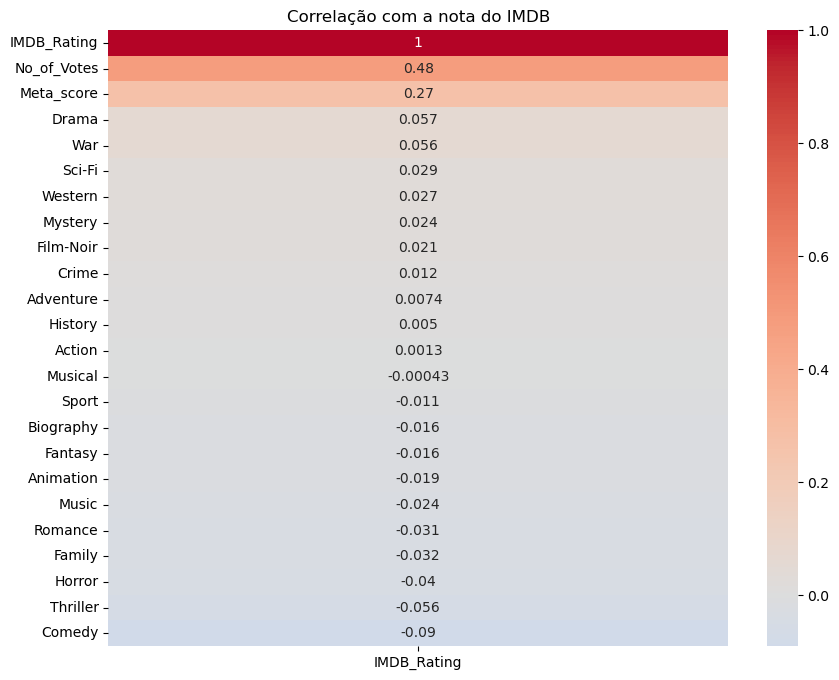

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

dc = pd.read_csv("desafio_indicium_imdb.csv")

dc = dc.drop(columns=["Unnamed: 0"], errors="ignore")

dc_genres = dc["Genre"].str.get_dummies(sep=", ")
dc = pd.concat([dc, dc_genres], axis=1)


numeric_dc = dc.select_dtypes(include="number")


corr = numeric_dc.corr()


target_corr = corr[["IMDB_Rating"]].sort_values(by="IMDB_Rating", ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação com a nota do IMDB", fontsize=12)
plt.show()

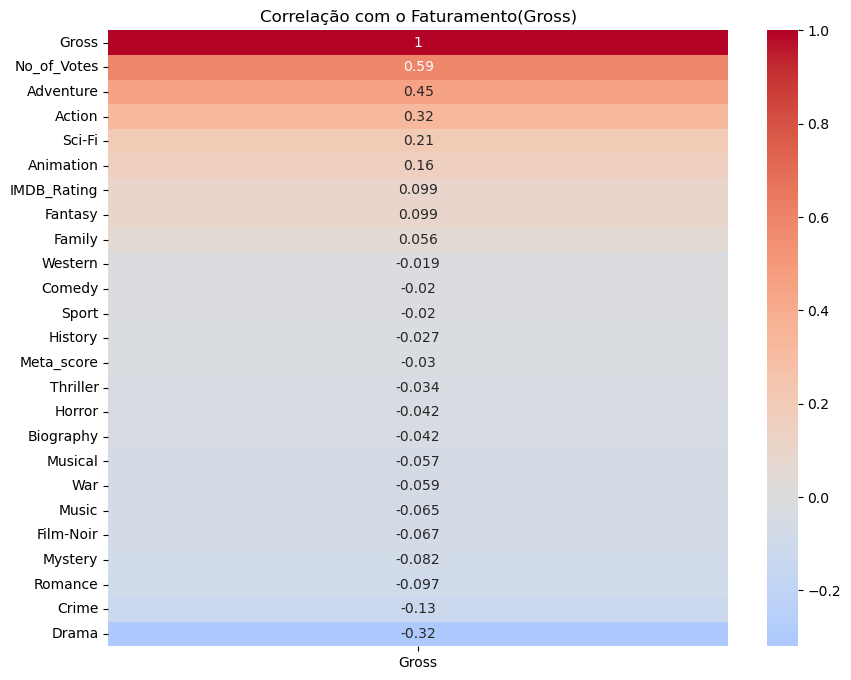

In [24]:
dc["Gross"] = dc["Gross"].replace(",", "", regex=True).astype(float)


numeric_dc = dc.select_dtypes(include="number")



dc["Gross"] = dc["Gross"].replace(",", "", regex=True).astype(float)


corr = numeric_dc.corr()


target_corr_gross = corr[["Gross"]].sort_values(by="Gross", ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(target_corr_gross, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação com o Faturamento(Gross)", fontsize=12)
plt.show()

### Interpretações

- A quantidade de votos tem forte correlação com a bilheteria (faturamento), tem sentido uma vez que, quanto maior o interesse do público, mais pessoas irão ao cinema.
- A nota do IMDB tem uma correlação razoável com o número de votos, consequentemente maior número de bilheteria. Interessante notar que a nota do IMDB (público) possui maior influência na bilheteria que a nota dos críticos traduzidas pelo Meta Score.
- É importante notar que o gênero que tem a correlação mais forte com a bilheteria é o de Aventura (0.42), seguido de Ação (0.28). 


##### 2. Responda também às seguintes perguntas:


##### a) Qual filme você recomendaria para uma pessoa que você não conhece?

In [25]:
votes_threshold = dc['No_of_Votes'].quantile(0.80)
gross_threshold = dc['Gross'].quantile(0.80)
rating_threshold = dc['IMDB_Rating'].quantile(0.80)

top_filmes = dc[
    (dc['No_of_Votes'] >= votes_threshold) &
    (dc['Gross'] >= gross_threshold) &
    (dc['IMDB_Rating'] >= rating_threshold)
][['Series_Title', 'No_of_Votes', 'Gross', 'IMDB_Rating']]

top_filmes

,Series_Title,No_of_Votes,Gross,IMDB_Rating
0,The Godfather,1620367,134966411.0,9.2
1,The Dark Knight,2303232,534858444.0,9.0
4,The Lord of the Rings: The Return of the King,1642758,377845905.0,8.9
7,Inception,2067042,292576195.0,8.8
9,The Lord of the Rings: The Fellowship of the Ring,1661481,315544750.0,8.8
10,Forrest Gump,1809221,330252182.0,8.8
12,The Lord of the Rings: The Two Towers,1485555,342551365.0,8.7
13,The Matrix,1676426,171479930.0,8.7
15,Star Wars: Episode V - The Empire Strikes Back,1159315,290475067.0,8.7
16,One Flew Over the Cuckoo's Nest,918088,112000000.0,8.7


##### Conclusão:

    Baseado na tríade: Nota IMDB, Número de votos e bilheteria, apostaria na recomendação de The Dark Knight.

##### b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

Pela visualização dos dados, pode-se afirmar que existe uma forte correlação das variáveis Número de Votos e do gênero Aventura com o sucesso de bilheteria, no entanto, não se pode afirmar que ambos tenham causalidade com o faturamento. Isso quer dizer que essas variáveis não explicam a causa do porquê ocorre o aumento de faturamento/bilheteria.

###### c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna

Apesar de ser uma variável qualitativa , ou seja, um campo não numérico, através dessa coluna se pode, principalmente, relatar,sim, qual o gênero do filme, treinando o código para que, através da frequência de palavras dizer a qual gênero o filme pertence.

##### 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [26]:
dc2 = dc1.copy()

In [27]:
X = dc2.drop(columns=['Unnamed: 0', 'Series_Title', 'IMDB_Rating', 'Director', 
                     'Star1', 'Star2', 'Star3', 'Star4']) 
y = dc2['IMDB_Rating']

In [28]:
dc2.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,The Godfather,1972,A,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,2,The Dark Knight,2008,UA,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,...,0,0,0,0,0,0,0,0,0,0
2,3,The Godfather: Part II,1974,A,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,4,12 Angry Men,1957,U,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,...,0,0,0,0,0,0,0,0,0,0
4,5,The Lord of the Rings: The Return of the King,2003,U,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = dc2[['Gross', 'Meta_score', 'No_of_Votes']]  # variáveis explicativas
y = dc2['IMDB_Rating']  # alvo

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(dc2[['Gross', 'Meta_score', 'No_of_Votes']].dtypes)

Gross          float64
Meta_score     float64
No_of_Votes      int64
dtype: object


In [33]:
dc2['Gross'] = dc2['Gross'].replace('[\$,]', '', regex=True).astype(float)

# Garantir que Meta_score e No_of_Votes também sejam numéricos
dc2['Meta_score'] = pd.to_numeric(dc2['Meta_score'], errors='coerce')
dc2['No_of_Votes'] = pd.to_numeric(dc2['No_of_Votes'], errors='coerce')

# Preencher nulos com a mediana
for col in ['Gross', 'Meta_score', 'No_of_Votes']:
    dc2[col] = dc2[col].fillna(dc2[col].median())

In [34]:
X = dc2[['Gross', 'Meta_score', 'No_of_Votes']].copy()

# Forçar tudo para numérico
X = X.apply(pd.to_numeric, errors='coerce')

# Preencher valores faltantes com a mediana
X = X.fillna(X.median())

In [40]:
correlacao = dc2['IMDB_Rating'].corr(dc2['Gross'])
print("Correlação entre IMDB e Gross:", correlacao)

Correlação entre IMDB e Gross: 0.08813921552836591


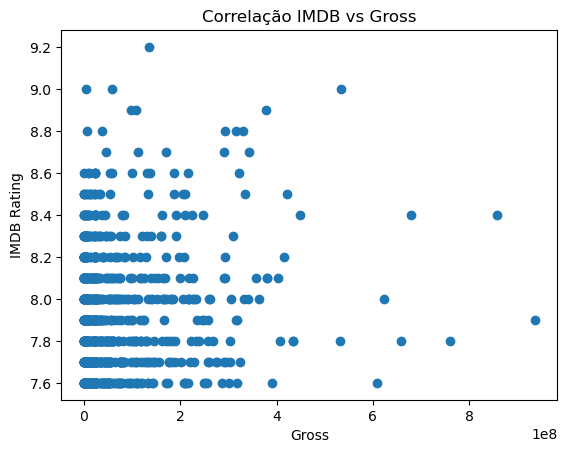

In [42]:
import matplotlib.pyplot as plt

plt.scatter(dc2['Gross'], dc2['IMDB_Rating'])
plt.xlabel('Gross')
plt.ylabel('IMDB Rating')
plt.title('Correlação IMDB vs Gross')
plt.show()

In [35]:
y = pd.to_numeric(dc2['IMDB_Rating'], errors='coerce')
y = y.fillna(y.median())

In [36]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

##### Resposta: 

- Visto que a previsão a ser feita se trata de um valor numérico, o método utilizado foi o de Regressão.
- Utilizei variáveis: Número de votos, Metascore e Faturamento, uma vez que as duas primeiras possuem maior correlação com a nota do IMDB.Também utilizei o faturamento porque também existe uma correlação com o sucesso do filme, que geralmente também reflete na nota do IMDB.
- O modelo utilizado foi o Random Forest Regressor que tem a capacidade de captura relações não-lineares entre variáveis explicativas e alvo, o que seria um pro nesse caso. O contra seria que ele é mais difícil de interpretar em relação à Regressão Linear. Para as medidas foram usadas o MAE, que seria a média do erro entre nota prevista x nota real, como também o R², para mostrar se o modelo está conseguindo detectar os padrões existentes.

##### 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


##### Qual seria a nota do IMDB?


In [45]:
import numpy as np

In [38]:
novo_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'}

In [41]:
dc_novo = pd.DataFrame([novo_filme])

In [43]:
dc_novo['Gross'] = pd.to_numeric(dc_novo['Gross'].replace('[\$,]', '', regex=True), errors='coerce')
dc_novo['Meta_score'] = pd.to_numeric(dc_novo['Meta_score'], errors='coerce')
dc_novo['No_of_Votes'] = pd.to_numeric(dc_novo['No_of_Votes'], errors='coerce')

X_novo = dc_novo[['Gross', 'Meta_score', 'No_of_Votes']]

In [44]:
nota_prevista = modelo.predict(X_novo)
print(f"Previsão de nota IMDb para {novo_filme['Series_Title']}: {nota_prevista[0]:.2f}")

Previsão de nota IMDb para The Shawshank Redemption: 8.80
